In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv


# Overview

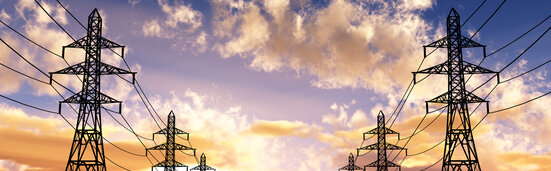

Hello, in this notebook we will take a look at the Hourly/Timeseries Electricity Consumption and Production data set.

***Part 2: I have used the dataset explored in this notebook to perform timeseries forecast, please take a look*** [here](https://www.kaggle.com/code/stefancomanita/timeseries-forecasting-with-regression-and-prophet)

# Imports

Do the imports, noting fancy.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data and quick look

1. After loading the data we set the date time as the index of the data frame.
2. We also check that indeed we have the expected columns, and see the data for the first time.
3. After running the shape command we see that we have 36772 rows and 9 columns in our data set.


In [3]:
df = pd.read_csv("/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv")
df = df.set_index("DateTime")
df.index = pd.to_datetime(df.index)

pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)

df.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [4]:
print(df.shape)

(36772, 9)


# Plot the data
Now let's get to the fun part, plotting the data!

### General Consumption and Production

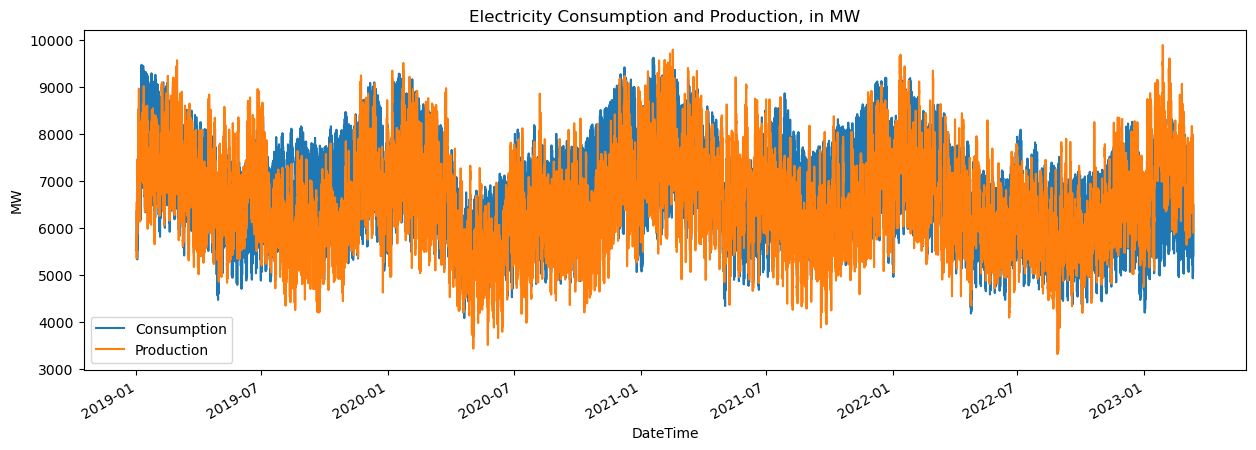

In [5]:
# Let's start with a broad overview, this is the electricity consumption and production plot for our entiere data set

df[["Consumption", "Production"]].plot(style="-", figsize=(15, 5), title="Electricity Consumption and Production, in MW")
plt.ylabel('MW')
plt.show()

### Electircity Export and Imports
When the production is greater than the consumption it means we are exporting electricity, when the value is smaller it means we are importing electricity.
Let's plot this imports versus imports!
**Please note that this section is a little slower (about one minute)**

In [6]:
df.head()


,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


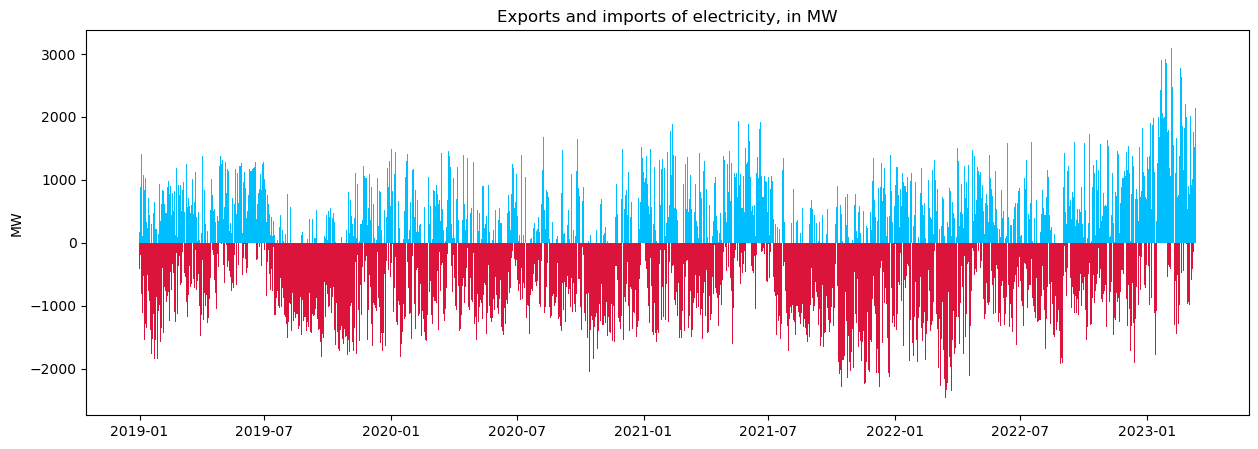

CPU times: user 53.1 s, sys: 717 ms, total: 53.8 s
Wall time: 53.5 s


In [7]:
%%time

# add a new column for the delta
df["delta"] = df["Production"] - df["Consumption"]

plt.rcParams["figure.figsize"] = (15,5)

plt.bar(
    df.index, df['delta'],
    color=np.where(df['delta'] > 0, 'deepskyblue', 'crimson')
)

plt.title("Exports and imports of electricity, in MW")
plt.ylabel('MW')
plt.show()

# drop the column we have used for the delta
df.drop(["delta"], axis=1, inplace=True)

### Weekly electricity consumption

Now let's look at the electricity consumption for a week. This is a graph I like quite a lot, as is the "graph of human activity", becouse it fallows human patterns.

We notice that the five work days apre pretty much identical and that the weekend and particularly Sunday are more lazy.

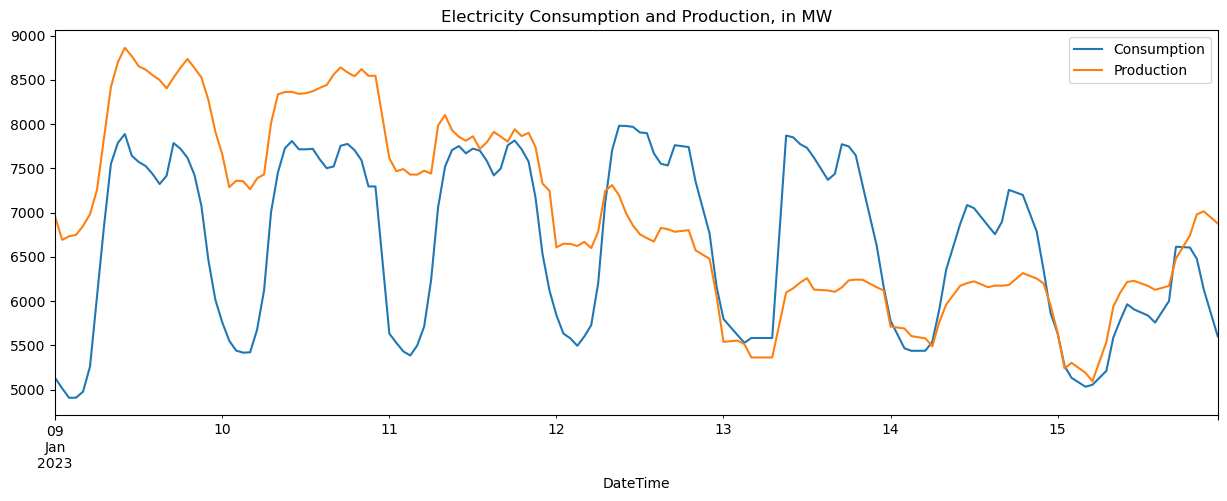

In [11]:
df["2023-01-09 00:00:00" : "2023-01-15 23:59:59"]["Consumption"].plot(style="-", figsize=(15, 5), title="Electricity Consumption and Production, in MW")
df["2023-01-09 00:00:00" : "2023-01-15 23:59:59"]["Production"].plot(style="-", figsize=(15, 5), title="Electricity Consumption and Production, in MW")
plt.legend()
plt.show()

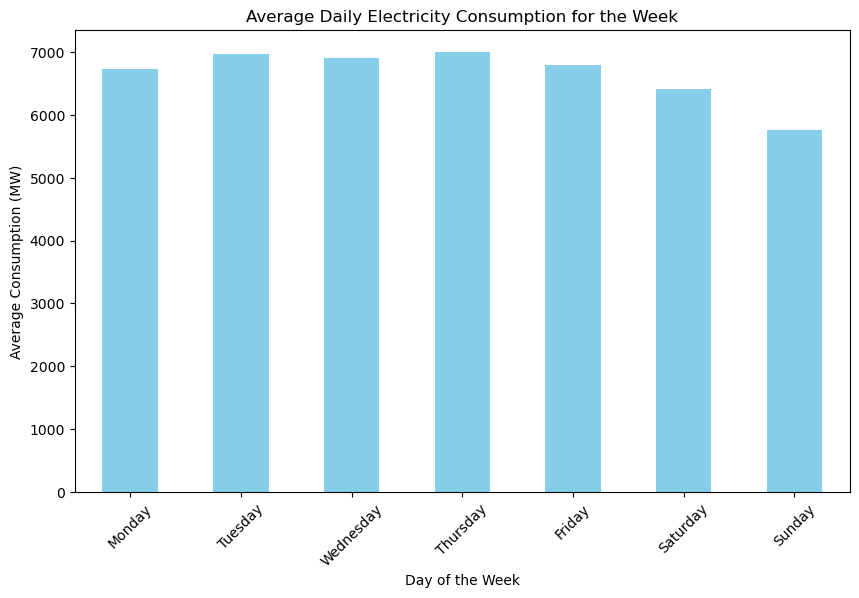

In [12]:
# Assuming 'df' contains your dataset

# Extracting data for the specified week
week_data = df["2023-01-09 00:00:00" : "2023-01-15 23:59:59"]

# Grouping data by day of the week and calculating the mean consumption for each day
daily_consumption = week_data["Consumption"].groupby(week_data.index.day_name()).mean()

# Reordering the days of the week for better visualization
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_consumption = daily_consumption.reindex(days_order)

# Plotting the average daily consumption for the specified week
daily_consumption.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Daily Electricity Consumption for the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Consumption (MW)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### Electricity Production by Type
Now let us look at the yearly production of electricity per production type, I also find this graphs very interesting

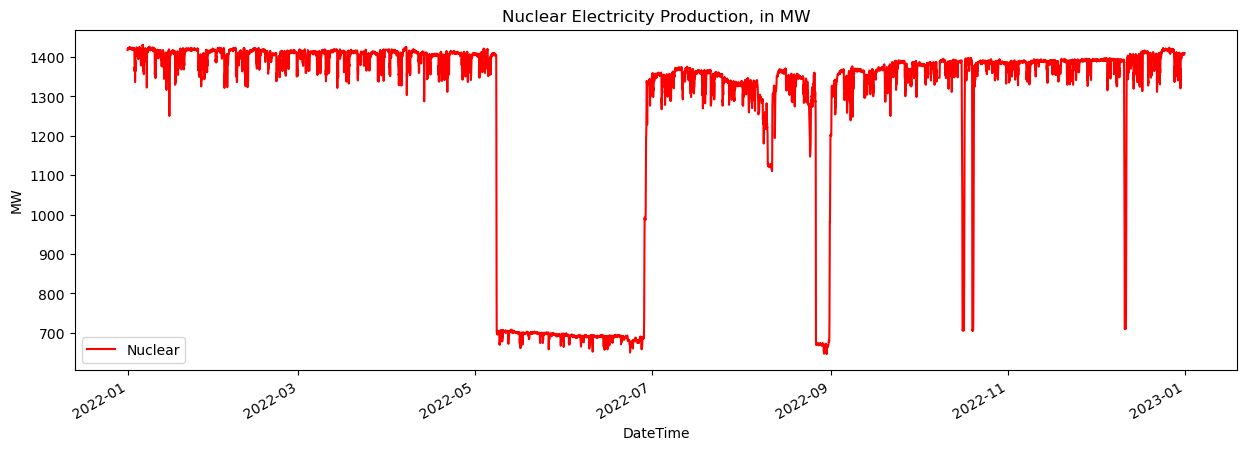

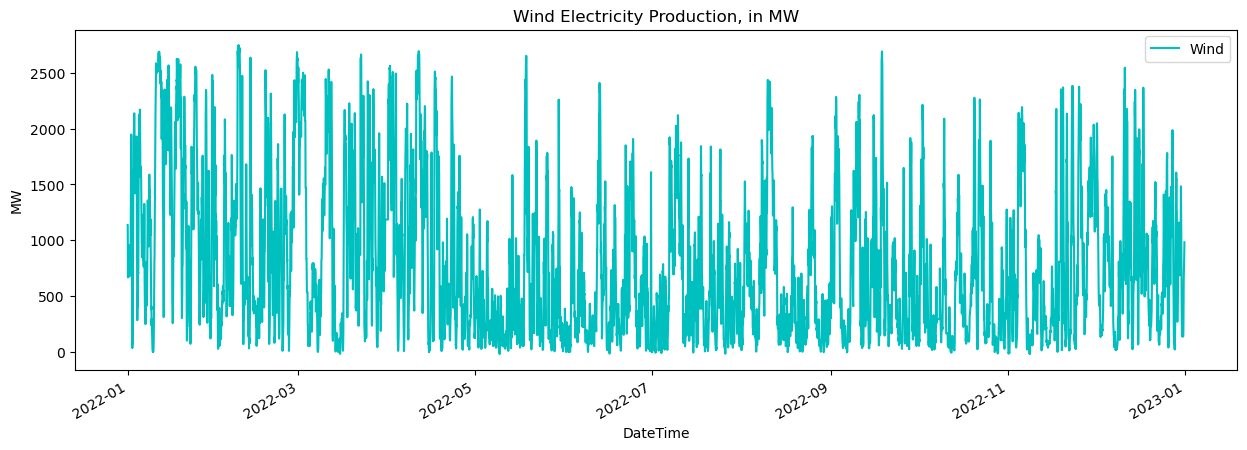

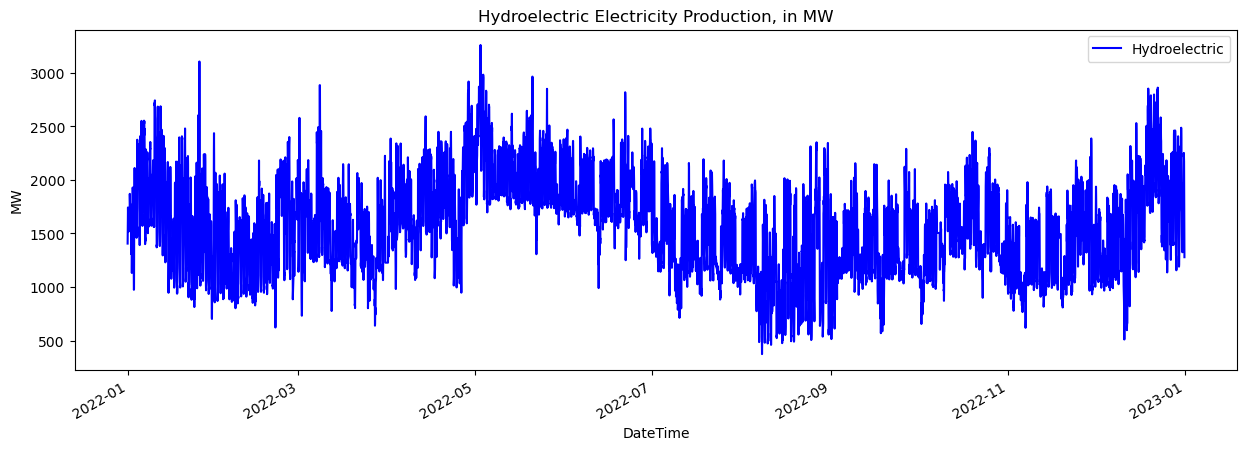

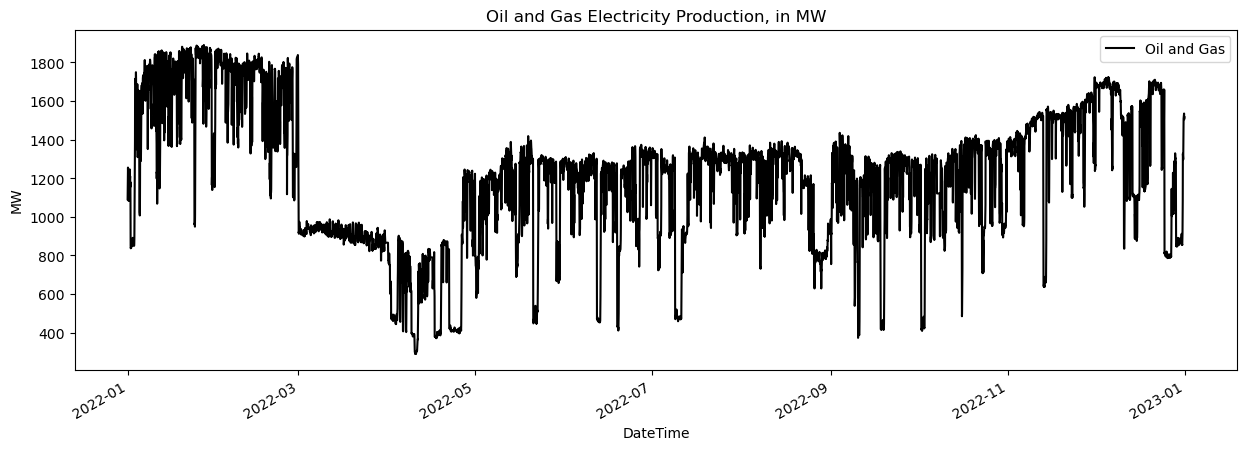

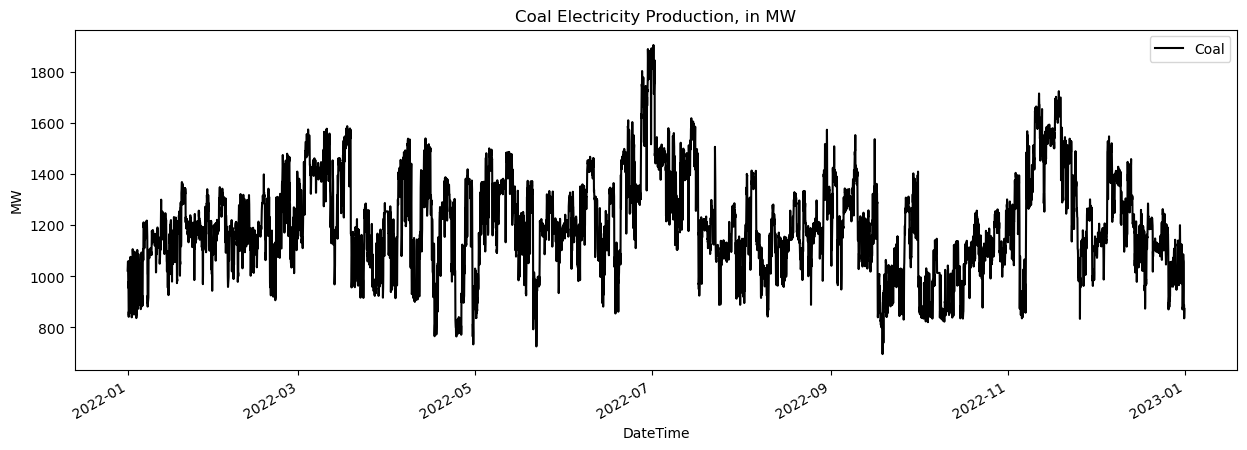

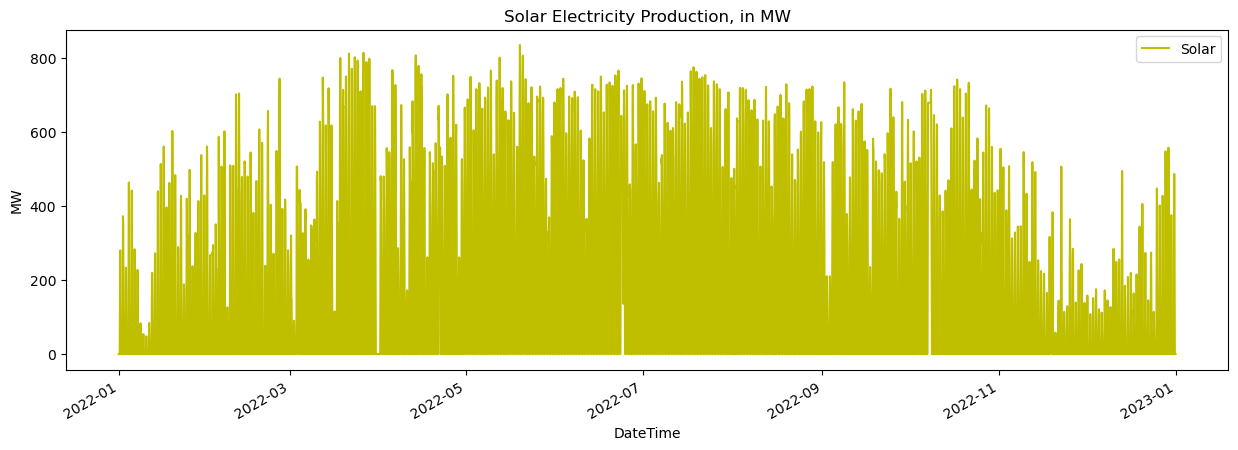

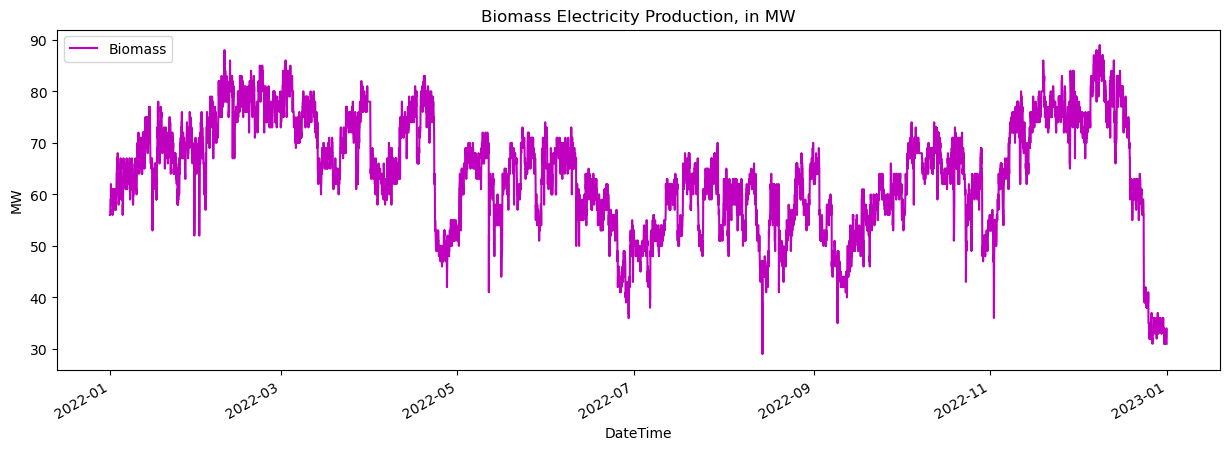

In [13]:
dfYear = df["2022-01-01 00:00:00" : "2022-12-31 23:59:59"]
productionTypes = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

colorMap = {"Nuclear":"r", "Wind":"c", "Hydroelectric":"b", "Oil and Gas":"k", "Coal":"k", "Solar":"y", "Biomass":"m"}

for productionType in productionTypes:
    dfYear[[productionType]].plot(style="-", figsize=(15, 5), title=f"{productionType} Electricity Production, in MW", color=colorMap.get(productionType))
    plt.ylabel('MW')
    plt.show()

### Renewables inspection

We are fortunate to have data for renewables, we will look at hydroelectric, wind and solar generation types. I have chosen the sumer time in order to be as fair as possible to solar.

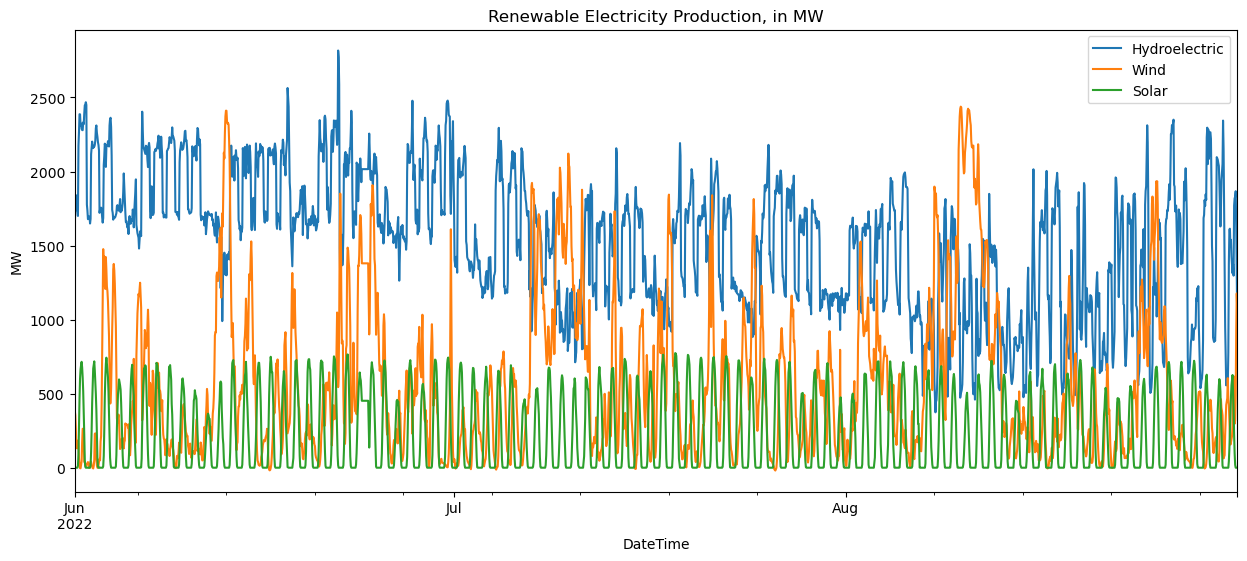

In [14]:
dfSummer = df[["Hydroelectric", "Wind", "Solar"]]["2022-06-01 00:00:00" : "2022-08-31 23:59:59"]
dfSummer.plot(style="-", figsize=(15, 6), title=f"Renewable Electricity Production, in MW")
plt.ylabel('MW')
plt.show()

# Conclusion
I think this is a very interesting dataset. In my opinion it shows that hidroelectric and nuclear electricity production are the most reliable, but they still suffer from weather (in the case of hydroelectric) and mentanance in the case of nuclear.

Wind is not predictible at all, but when it blows it can gnerate big electricity outputs.

Gas and oil are still a big part of electricity production and they where affeted by the onset of the Ukraine war.

A balanced grid needs a few types of electricity production and to be connected with it's neighbours (import and export)

# Finish
You made it to the finish, thank you!

***In Part 2 I perform timeseries forecast on this same dataset, please take a look*** [here](https://www.kaggle.com/code/stefancomanita/timeseries-forecasting-with-regression-and-prophet)